<a href="https://colab.research.google.com/github/olgashlemko/ML/blob/main/Analyzing_factors_that_affected_the_Titanic_survival_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The main purpose of working with the current dataset :
Based on data, analyze and make data-driven conclusions on economic and social factors of "Titanic" trategy

**Preparig Data for Upload**

**Task:**
1. Identify the factors that actually determined the survival of people on board
2. Based on fundamental statistical principles, select the most optimized training method for building a predictive model with similar datasets

# **1- Data Overview and pre-analysis. Preparing Basic Data Statistics to choose the most optimized prediction model**
- Upload data.
- Verification of absences, basic statistics

In [2]:
import pandas as pd

In [3]:
!unzip "/archive (2).zip" -d .
!unzip "archive\ \(2\).zip" -d . #file name has spaces, so I used the code to escape the parentheses

unzip:  cannot find or open /archive (2).zip, /archive (2).zip.zip or /archive (2).zip.ZIP.
unzip:  cannot find or open archive\ \(2\).zip, archive\ \(2\).zip.zip or archive\ \(2\).zip.ZIP.


In [5]:
path = "./Titanic-Dataset.csv"
df = pd.read_csv(path)

In [ ]:
import os
print(os.listdir('.'))

In [ ]:
# The next field shows that some data are missing in the file, so to predict the error during data-analysis, we use the code.
print(df.isnull().sum())

# Below see the basic data statistic

In [6]:
import pandas as pd

df = pd.read_csv("Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Handling missing data to train the model prediction

In [8]:
missing_percent = df.isnull().mean() * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))


Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64


**Analyzing missing data to choose most relative metrics for prediction model**


1. Cabin data has 77% missing values, so we'd better drop it.
2. Age data doesn't have that many missing values (~19%), so we'll import it.
3. Embarked—2%. Very few missing values, so we'll fill in with the most common values.

In [9]:
# applying
df.drop(columns=['Cabin'], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)


/tmp/ipython-input-2769653818.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
/tmp/ipython-input-2769653818.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

# **2 - Data Visualization ( EDA) for data-driven decision on which prediction model to choose**
For the Titanic Dataset: visualize the relationships between characteristics and survival (e.g., distributions by age and gender, heatmap of correlations, bar chart of survival by class, gender, etc.).

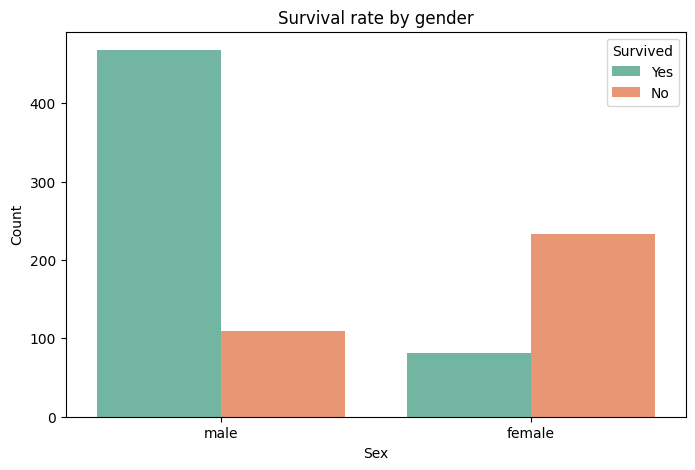

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set2')
plt.title("Survival rate by gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["Yes", "No"])
plt.show()


In [11]:
#data summary in %
survival_by_sex = df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack() * 100
survival_by_sex.columns = ['Did Not Survive (%)', 'Survived (%)']
print(survival_by_sex.round(2))


        Did Not Survive (%)  Survived (%)
Sex                                      
female                25.80         74.20
male                  81.11         18.89


# **Based on data above, 74% of women survived, compared to 25.8% of men.**

Візуалізація виживання За віком та PSClass


/tmp/ipython-input-3771822010.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Did Not Survive', shade=True)
/tmp/ipython-input-3771822010.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', shade=True)


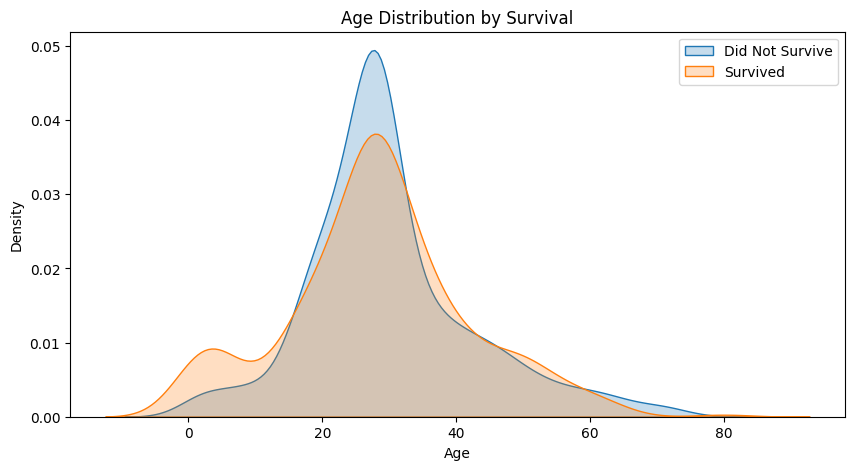

In [12]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Did Not Survive', shade=True)
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', shade=True)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()


In [13]:
#data summary in %
survival_by_pclass = df.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack() * 100
survival_by_pclass.columns = ['Did Not Survive (%)', 'Survived (%)']
print(survival_by_pclass.round(2))


        Did Not Survive (%)  Survived (%)
Pclass                                   
1                     37.04         62.96
2                     52.72         47.28
3                     75.76         24.24


#  Based on the Correlation Heatmap Visualization below, we can now see and further decide on the most relative metrics for model prediction

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129482 (\N{ICE CUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


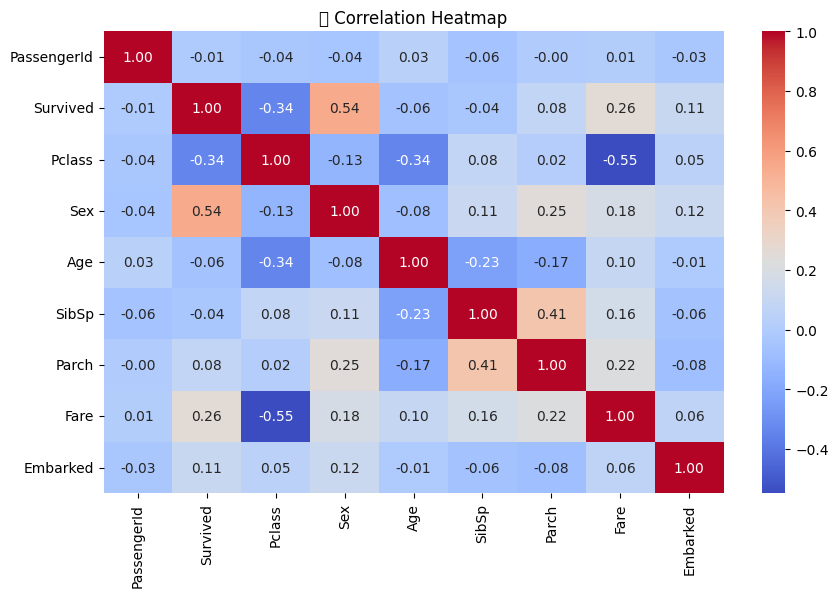

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

#encoding

df_corr = df.copy()
df_corr['Sex'] = df_corr['Sex'].map({'male': 0, 'female': 1})
df_corr['Embarked'] = df_corr['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# deleting non-numeric
non_numeric = ['Name', 'Ticket']  # 'Cabin' is already dropped earlier
df_corr.drop(columns=non_numeric, inplace=True)

#see the data
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🧊 Correlation Heatmap")
plt.show()



**Conclusion:** Since the main preliminary task was to identify the factors that actually determined the survival of people on board, this visualization tells us the following:
- We see that gender (Sex X Survival) correlates most strongly with survival, so gender did matter for survival
- Pclass (Rkfc) correlates most strongly with Fare (Price), but also correlates with survival, so socioeconomic status also mattered for survival
- Price also correlates
- Age (Age and Parch) also has a negative effect

Therefore, socioeconomic status and demographics had the greatest impact on survival

Note: Therefore, for our task of predicting whether age, class, gender, ticket price, and number of relatives on board were significant, we will definitely use the following dependencies in building the prediction model
- Sex
- Pclass
- Fare

#3 - Data Preprocessing:
Normalization/scaling (for numerical data).
Tokenization/TF-IDF/embeddings (for text).

In [15]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


First, all data was normalized and cleaned:
- Numbers were scaled
- Categorical values such as Sex were label encoded
- We cleaned the data from PassengerId, Name, Ticket in X

# 4- Modeling
- Building a base model (Logistic Regression / Random Forest / SVM / other).
Comparison with other models.
- Division into train/test.

From the previous data, I will select two models that make the most sense for the forecasting task:
- Logistic Regression: we have a small dataset, and there is a definite direct dependence on X (features) and target Y (Survival).
- Random Forest Classifier: does not have as much overfitting and indicates the importance of features.

Knn is not suitable for us, as it makes more sense for large datasets, is very sensitive to scaling, and is not suitable for conclusions and explanations.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [20]:
# Categorical Meaning
df_model = df.copy()
df_model['Sex'] = LabelEncoder().fit_transform(df_model['Sex'])  # female = 0, male = 1

# Scaling Fare and Pclass
scaler = StandardScaler()
df_model[['Pclass', 'Fare']] = scaler.fit_transform(df_model[['Pclass', 'Fare']])

# Determining dependencies on X and y
X = df_model[['Sex', 'Pclass', 'Fare']]
y = df_model['Survived']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

# Random Forest ( ставлю дефолтну глибину)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


# 5- Model Assessment
Metrics: accuracy, precision, recall, F1-score, confusion matrix.


**Model comparison**

In [24]:
from sklearn.metrics import classification_report, accuracy_score

# Accuracy comparison
print("Model Accuracy Comparison:")
print("Logistic Regression:", accuracy_score(y_test, logreg_pred))
print("Random Forest:", accuracy_score(y_test, rf_pred))

# Detailed classification report
print("Logistic Regression Report:")
print(classification_report(y_test, logreg_pred))

print("Random Forest Report:")
print(classification_report(y_test, rf_pred))


Model Accuracy Comparison:
Logistic Regression: 0.776536312849162
Random Forest: 0.7653631284916201
Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.73      0.67      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.77       179

Random Forest Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       110
           1       0.69      0.71      0.70        69

    accuracy                           0.77       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.77      0.77      0.77       179



**Conclusion**: Based on the result metrics such as precision and recall, F1 score, both training models such as  "Logistic Regression" & "Random Forest" are good, as the predictions in both models hardly differ from the actual data (precision vs recall).
However, the Random Forest classifier outperformed logistic regression in terms of accuracy.

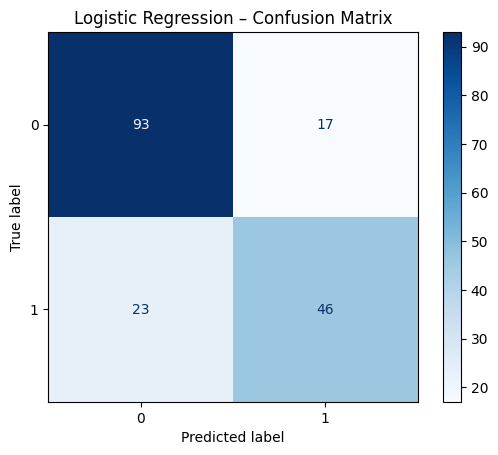

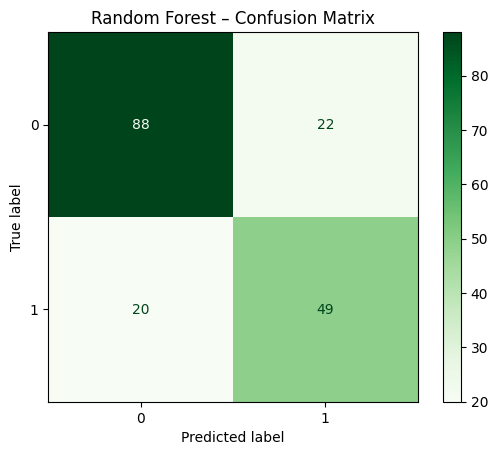

In [26]:
# МMatrix of mixture and importance of features


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistic Regression Confusion Matrix
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, cmap="Blues")
plt.title("Logistic Regression – Confusion Matrix")
plt.show()

# Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap="Greens")
plt.title("Random Forest – Confusion Matrix")
plt.show()


/tmp/ipython-input-2846651676.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


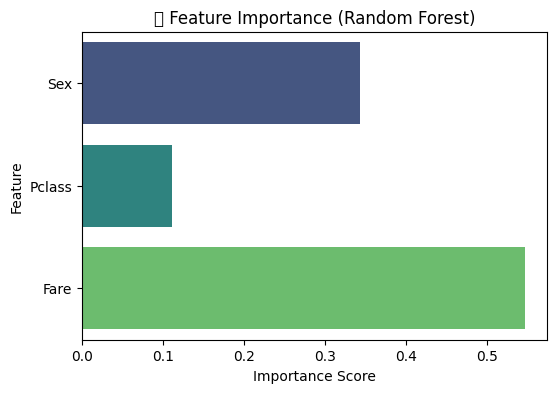

In [25]:
#Let's check again the importance of features for the tree model.

import seaborn as sns

# Create feature importance plot
importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("🔍 Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


**Model comparison Conclusion:** Although logistic regression correctly identified many passengers, it had a higher rate of false negatives—it failed to predict some survivors. In contrast, Random Forest demonstrated a better balance, identifying more survivors and reducing both false positives and false negatives. This indicates that Random Forest is more reliable in critical scenarios where identifying survivors is extremely important.

# **6 - Conclusions :**

In this task, I first identified the main factors that determined passenger survival in the Titanic disaster, highlighting those with the greatest impact based on multiple dataset metrics.

To refine feature selection, I conducted correlation and visualization analysis, which revealed that **economic factors (passenger class, ticket price) and social factors (gender) had the strongest influence on survival outcomes.**

Using these variables (Pclass, Sex, Ticket Price) as inputs (X) to predict survival (Y), I compared two training models: Logistic Regression and Random Forest. Both models performed well when evaluated on accuracy, precision, recall, and F1 score, with Random Forest outperforming Logistic Regression, suggesting that the relationships between features and survival were at least partly nonlinear.

This analysis highlights that before model training, it is essential to:

- Assess data quality and structure.
- Develop a clear analysis strategy.
- Use exploratory analysis and visualization to identify the most relevant features.

Ultimately, the study demonstrates the value of combining feature selection with model comparison to build a predictive system that is both effective and interpretable.
